In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
#wl
wl = np.genfromtxt("spocData/wavelengths_flat.txt") #Shape: (64336,) 
#tr_ID
tr_ID = np.genfromtxt("spocData/star_names.txt",dtype='str',delimiter='\n') #(1201,)
#tr_flux
tr_flux = np.genfromtxt("spocData/fluxes_contdiv_polynomial_all.txt")#(1201, 64336)
#tr_ivar
tr_ivar = np.loadtxt("spocData/ivar_contdiv_polynomial_all.txt") #(1201, 64336)

OSError: spocData/wavelengths_flat.txt not found.

In [ ]:
iodineData = np.genfromtxt("iodineAtlas.txt",skip_header=5)

In [ ]:
def WavenumberToWavelength(wavenumber):
    '''
    cm^-1 to angstroms
    '''
    return 100000000/wavenumber
#Changing all wavenumbers from the iodineData 
for i in range(iodineData.shape[0]):
    iodineData[i][0] = WavenumberToWavelength(iodineData[i][0])
wavelength = []
transmission = []
for pair in iodineData:
    wavelength += [pair[0]]
    transmission += [pair[1]]

In [28]:
for i in range(len(transmission)):
    transmission[i] = transmission[i]/100

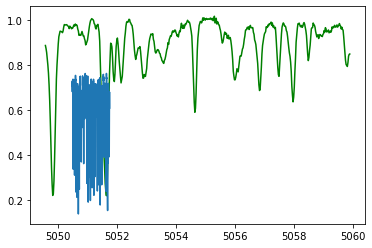

In [61]:
specSTART = len(wl) - 600
specSTOP = len(wl)-100
IodiSTART = 1159000 -  50000
IodiSTOP =  1160000  - 50000
plt.plot(wl[specSTART:specSTOP],tr_flux[0][specSTART:specSTOP],"g")
plt.plot(wavelength[IodiSTART:IodiSTOP],transmission[IodiSTART:IodiSTOP])
plt.show()

In [68]:
def lookingForLine(line,wavelengthList):
    '''
    Gives a wavelength range the line should be at
    '''
    i = len(wavelengthList) - 1  #The list is backwards (At least the original was)
    while wavelengthList[i] < line:
        i -= 1
    return int(i-5000),int(i+5000) #start, end 

In [69]:
w = [5161.20, 5338.22, 5345.15, 5464.62, 5625.69]

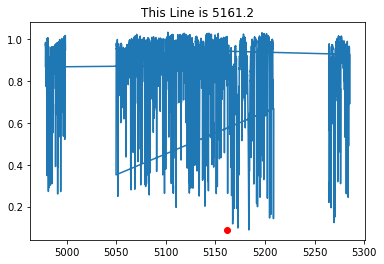

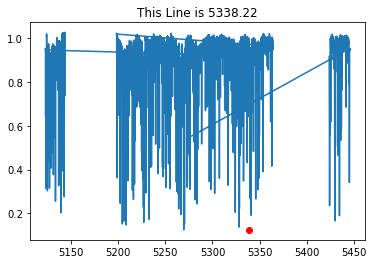

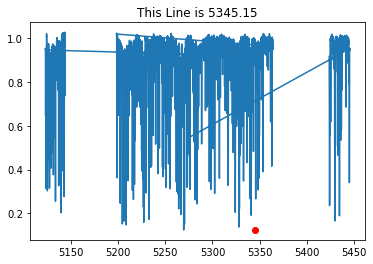

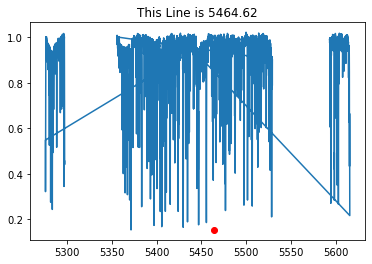

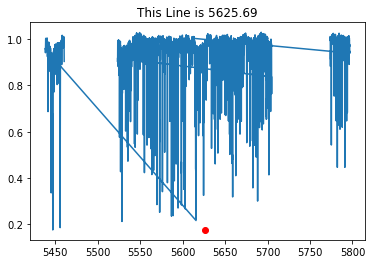

In [70]:
for line in w:
    s, e = lookingForLine(line,wl)
    plt.plot(wl[s:e],tr_flux[0][s:e])
    plt.plot(line,min(tr_flux[0][s:e]),'ro') 
    plt.title("This Line is {}".format(line))
    plt.show()